In [ ]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
len(os.listdir('drive/MyDrive/Practice_datasets/Satellite data/cloudy')),len(os.listdir('drive/MyDrive/Practice_datasets/Satellite data/desert')),len(os.listdir('drive/MyDrive/Practice_datasets/Satellite data/green_area')),len(os.listdir('drive/MyDrive/Practice_datasets/Satellite data/water'))

(1500, 1131, 1500, 1500)

In [ ]:
# Specify the path of the folder you want to pick files from
folder_path1 = "drive/MyDrive/Practice_datasets/Satellite data/cloudy"
folder_path2 = "drive/MyDrive/Practice_datasets/Satellite data/desert"
folder_path3 = "drive/MyDrive/Practice_datasets/Satellite data/green_area"
folder_path4 = "drive/MyDrive/Practice_datasets/Satellite data/water"


# Get a list of all files in the folder
files_in_cloudy = os.listdir(folder_path1)
files_in_desert = os.listdir(folder_path2)
files_in_green_area = os.listdir(folder_path3)
files_in_water = os.listdir(folder_path4)


# You can now work with the list of file names in 'files_in_folder'
len(files_in_cloudy),len(files_in_desert),len(files_in_green_area),len(files_in_water)

(1500, 1131, 1500, 1500)

In [ ]:
valid_extensions = {'.jpg', '.jpeg', '.png', '.JPEG'}

In [ ]:
file_name_cloudy = [f"drive/MyDrive/Practice_datasets/Satellite data/cloudy/{fname}" for fname in files_in_cloudy if os.path.splitext(fname)[-1].lower() in valid_extensions]
file_name_desert = [f"drive/MyDrive/Practice_datasets/Satellite data/desert/{fname}" for fname in files_in_desert if os.path.splitext(fname)[-1].lower() in valid_extensions]
file_name_green_area = [f"drive/MyDrive/Practice_datasets/Satellite data/green_area/{fname}" for fname in files_in_green_area if os.path.splitext(fname)[-1].lower() in valid_extensions]
file_name_water = [f"drive/MyDrive/Practice_datasets/Satellite data/water/{fname}" for fname in files_in_water if os.path.splitext(fname)[-1].lower() in valid_extensions]

In [ ]:
array_of_cloudy = [0] * len(file_name_cloudy)
array_of_desert = [1] * len(file_name_desert)
array_of_green_area = [2] * len(file_name_green_area)
array_of_water = [3] * len(file_name_water)

len(array_of_cloudy),len(array_of_desert),len(array_of_green_area),len(array_of_water)

(1500, 1131, 1500, 1500)

In [ ]:
label_array = array_of_cloudy + array_of_desert + array_of_green_area + array_of_water
len(label_array)

5631

In [ ]:
if type(label_array) is list:
    print("This is a list.")
else:
    print("This is not a list.")

This is a list.


In [ ]:
label_array = np.array(label_array)

In [ ]:
label_array

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
file_name = file_name_cloudy + file_name_desert + file_name_green_area + file_name_water

In [ ]:
file_name = np.array(file_name)

In [ ]:
if type(file_name) is list:
    print("This is a list.")
else:
    print("This is not a list.")

This is not a list.


In [ ]:
data = {'file_name': file_name, 'label': label_array}
df = pd.DataFrame(data)

In [ ]:
df

,file_name,label
0,drive/MyDrive/Practice_datasets/Satellite data...,0
1,drive/MyDrive/Practice_datasets/Satellite data...,0
2,drive/MyDrive/Practice_datasets/Satellite data...,0
3,drive/MyDrive/Practice_datasets/Satellite data...,0
4,drive/MyDrive/Practice_datasets/Satellite data...,0
...,...,...
5626,drive/MyDrive/Practice_datasets/Satellite data...,3
5627,drive/MyDrive/Practice_datasets/Satellite data...,3
5628,drive/MyDrive/Practice_datasets/Satellite data...,3
5629,drive/MyDrive/Practice_datasets/Satellite data...,3


In [ ]:
dataset = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
dataset.head()

,file_name,label
0,drive/MyDrive/Practice_datasets/Satellite data...,2
1,drive/MyDrive/Practice_datasets/Satellite data...,1
2,drive/MyDrive/Practice_datasets/Satellite data...,2
3,drive/MyDrive/Practice_datasets/Satellite data...,1
4,drive/MyDrive/Practice_datasets/Satellite data...,3


In [ ]:
X_dataset = dataset["file_name"].values
Y_dataset = dataset["label"].values

In [ ]:
if type(Y_dataset) is list:
    print("my_list is a list.")
else:
    print("my_list is not a list.")

my_list is not a list.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version", tf.__version__)
print("Tensorflow hub version", hub.__version__)
print ("GPU available " if tf.config.list_physical_devices("GPU") else "not available ")

Tensorflow version 2.12.0
Tensorflow hub version 0.14.0
GPU available 


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X_dataset[:2000], Y_dataset[:2000], test_size=0.3)

In [ ]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)

In [ ]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape

((1400,), (1400,), (300,), (300,), (300,), (300,))

In [ ]:

from PIL import Image

# Assuming x_train is your list of image file paths
def process_image(image_paths, target_size=(224, 224)):
    processed_images = []
    for path in image_paths:
        img = Image.open(path)
        img = img.resize(target_size)
        img = img.convert("RGB")  # Ensure the image is in RGB mode
        img_array = np.array(img)
        img_array = img_array.astype(np.uint8)  # Convert the dtype to uint8
        processed_images.append(img_array)
    return processed_images

In [ ]:
x_train_image = process_image(x_train)
x_valid_image = process_image(x_valid)
x_test_image = process_image(x_test)

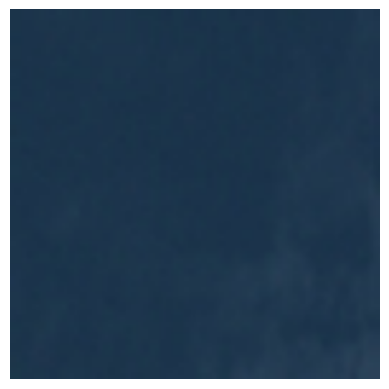

In [ ]:
plt.imshow(x_test_image[1])
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
x_train_image = np.array(x_train_image)
x_valid_image = np.array(x_valid_image)
x_test_image = np.array(x_test_image)

In [ ]:
if type(x_train_image) is list:
    print("my_list is a list.")
else:
    print("my_list is not a list.")

my_list is not a list.


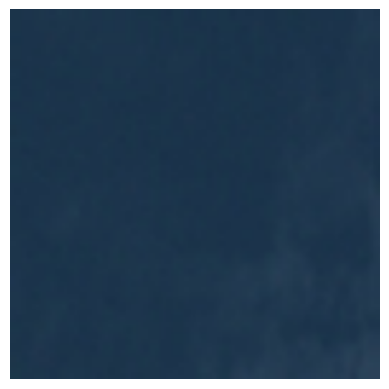

In [ ]:
plt.imshow(x_test_image[1])
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
x_train_image.shape, y_train.shape, x_valid_image.shape, y_valid.shape, x_test_image.shape, y_test.shape

((1400, 224, 224, 3),
 (1400,),
 (300, 224, 224, 3),
 (300,),
 (300, 224, 224, 3),
 (300,))

In [ ]:
x_train_image.dtype

dtype('uint8')

In [ ]:
x_train_image = x_train_image.astype(float)
x_valid_image = x_valid_image.astype(float)
x_test_image = x_test_image.astype(float)

In [ ]:
x_train_image.shape, y_train.shape, x_valid_image.shape, y_valid.shape, x_test_image.shape, y_test.shape

((1400, 224, 224, 3),
 (1400,),
 (300, 224, 224, 3),
 (300,),
 (300, 224, 224, 3),
 (300,))

In [ ]:
x_train_image = x_train_image/255
x_valid_image = x_valid_image/255
x_test_image = x_test_image/255

In [ ]:
x_train_image.dtype

dtype('float64')

In [ ]:
x_train_image.shape, y_train.shape, x_valid_image.shape, y_valid.shape, x_test_image.shape, y_test.shape

((1400, 224, 224, 3),
 (1400,),
 (300, 224, 224, 3),
 (300,),
 (300, 224, 224, 3),
 (300,))

In [ ]:
x_train_image[1]

array([[[0.64705882, 0.51372549, 0.50980392],
        [0.65490196, 0.52156863, 0.51764706],
        [0.65882353, 0.5254902 , 0.52156863],
        ...,
        [0.62352941, 0.52156863, 0.51764706],
        [0.63137255, 0.52941176, 0.5254902 ],
        [0.63921569, 0.5372549 , 0.53333333]],

       [[0.64705882, 0.51372549, 0.50980392],
        [0.65490196, 0.52156863, 0.51764706],
        [0.65882353, 0.5254902 , 0.52156863],
        ...,
        [0.61960784, 0.51764706, 0.51372549],
        [0.6       , 0.49803922, 0.49411765],
        [0.57647059, 0.4745098 , 0.47058824]],

       [[0.64705882, 0.51372549, 0.50980392],
        [0.65490196, 0.52156863, 0.51764706],
        [0.65882353, 0.5254902 , 0.52156863],
        ...,
        [0.63137255, 0.52941176, 0.5254902 ],
        [0.61176471, 0.50980392, 0.50588235],
        [0.57647059, 0.4745098 , 0.47058824]],

       ...,

       [[0.65098039, 0.54901961, 0.54509804],
        [0.65098039, 0.54901961, 0.54509804],
        [0.64705882, 0

In [ ]:
Input_shape = x_train_image[0].shape
Input_shape

(224, 224, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=(5, 5), activation='relu', input_shape=Input_shape))
model.add(MaxPooling2D())

model.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=4, kernel_size=(5, 5), activation='relu'))
#model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
#model.add(AveragePooling2D(2,2))
model.add(Dropout(0.3))


#model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
#model.add(Dense(units=216, activation='relu'))
#model.add(Dense(units=86, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 12)      912       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 12)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 8)       2408      
                                                                 
 conv2d_5 (Conv2D)           (None, 102, 102, 4)       804       
                                                                 
 dropout_1 (Dropout)         (None, 102, 102, 4)       0         
                                                                 
 average_pooling2d_1 (Averag  (None, 51, 51, 4)        0         
 ePooling2D)                                          

In [ ]:
result = model.fit(x_train_image,
                        y_train,
                        batch_size=64,
                        epochs=50,
                        verbose=1,
                        validation_data = (x_valid_image,y_valid))

Epoch 1/50
22/22 [==============================] - 4s 150ms/step - loss: 1.1700 - accuracy: 0.4393 - val_loss: 0.7949 - val_accuracy: 0.5667
Epoch 2/50
22/22 [==============================] - 1s 64ms/step - loss: 0.7248 - accuracy: 0.6186 - val_loss: 0.5522 - val_accuracy: 0.6433
Epoch 3/50
22/22 [==============================] - 1s 65ms/step - loss: 0.5822 - accuracy: 0.6593 - val_loss: 0.5532 - val_accuracy: 0.6633
Epoch 4/50
22/22 [==============================] - 1s 65ms/step - loss: 0.5791 - accuracy: 0.6721 - val_loss: 0.5853 - val_accuracy: 0.6167
Epoch 5/50
22/22 [==============================] - 2s 81ms/step - loss: 0.5432 - accuracy: 0.6936 - val_loss: 0.4914 - val_accuracy: 0.7133
Epoch 6/50
22/22 [==============================] - 2s 85ms/step - loss: 0.4821 - accuracy: 0.7329 - val_loss: 0.4896 - val_accuracy: 0.7233
Epoch 7/50
22/22 [==============================] - 2s 72ms/step - loss: 0.5340 - accuracy: 0.7057 - val_loss: 0.4831 - val_accuracy: 0.7133
Epoch 8/50
2

In [ ]:
score = model.evaluate(x_test_image, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))
print('test Loss : {:.4f}'.format(score[0]))

Test Accuracy : 0.8233
test Loss : 0.3445


In [ ]:
predicted_probabilities = model.predict(x_test_image)
predicted_classes = np.argmax(predicted_probabilities, axis=-1)
predicted_classes

10/10 [==============================] - 0s 12ms/step


array([3, 3, 2, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 3, 1, 0, 3, 2, 2, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 3, 1, 3, 2, 3, 3, 2, 0, 2,
       3, 3, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 3, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 3, 0, 3, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 3, 1, 2, 0, 2, 2, 2, 2, 3,
       2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 3, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1,
       0, 3, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2,
       2, 1, 0, 1, 3, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 3, 1, 0, 1,
       2, 1, 0, 0, 2, 2, 3, 3, 2, 3, 2, 1, 2, 1, 2, 3, 0, 2, 0, 2, 3, 0,
       2, 0, 2, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 3, 0, 0, 2, 3, 0, 3, 1, 0,
       2, 2, 0, 0, 3, 2, 2, 3, 0, 2, 2, 1, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0,
       3, 0, 0, 2, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2])

In [ ]:
z = 0
for a in y_test:
  if predicted_classes[a] == y_test[a]:
    z= z+1
  else:
    z = z + 0
print(z)

300


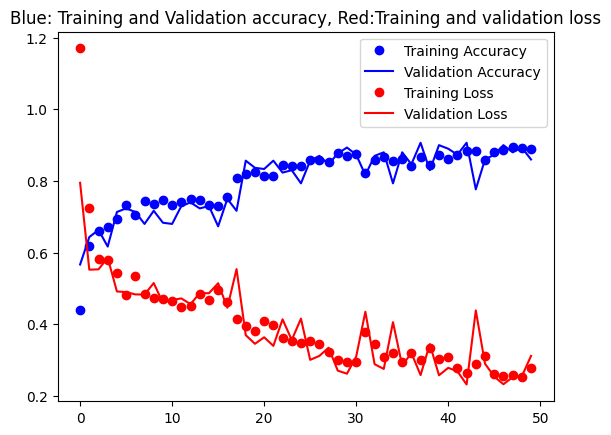

In [ ]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Blue: Training and Validation accuracy, Red:Training and validation loss')
plt.legend()
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
#plt.title('Training and validation loss')
plt.legend()
plt.show()

<Axes: >

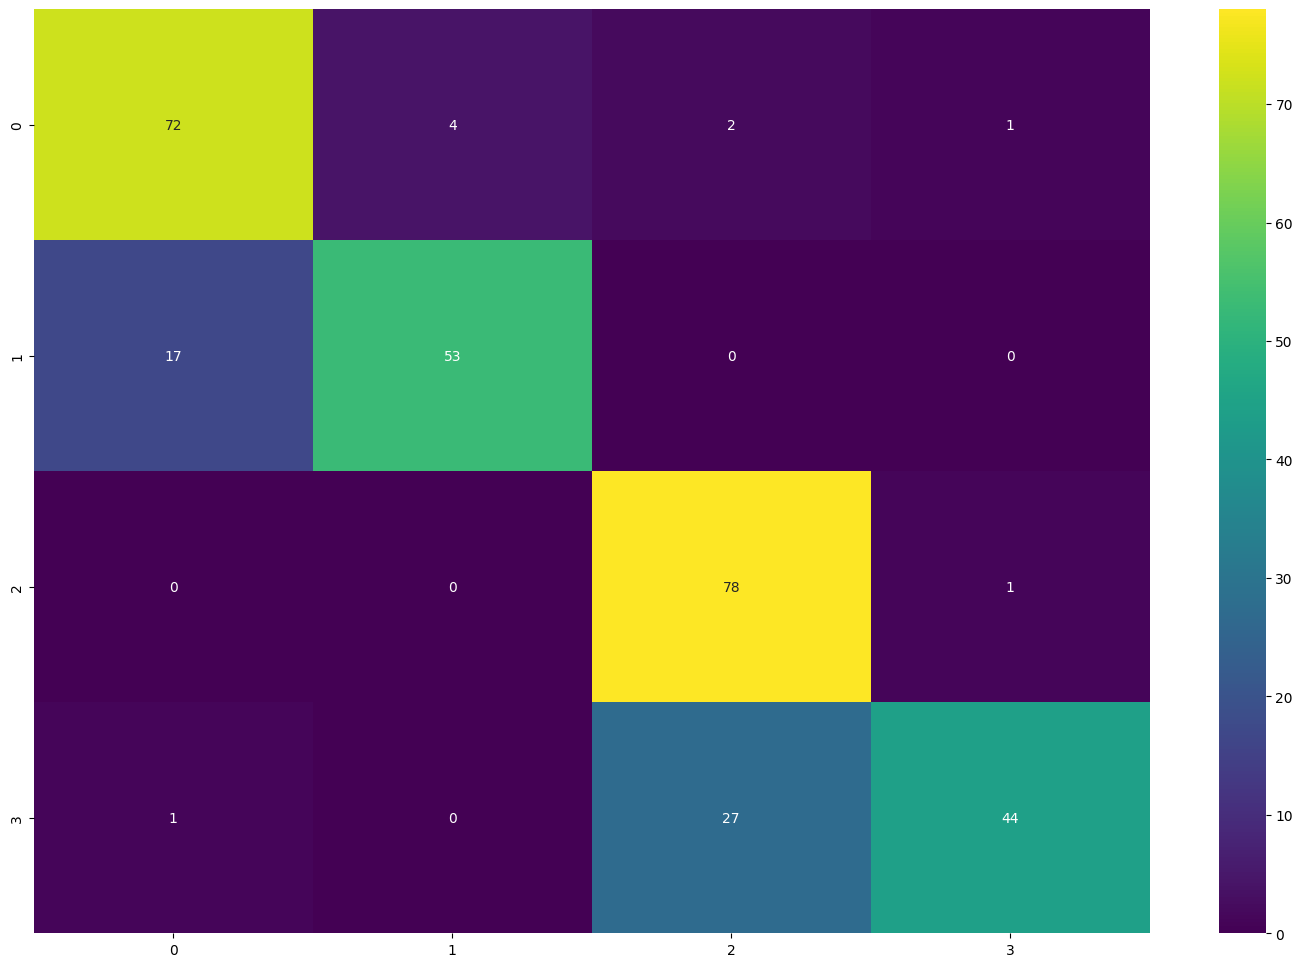

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (18,12))
colormap = 'viridis'
sns.heatmap(cm, annot=True , cmap=colormap)

In [ ]:
Its_predicted=['cloudy', 'desert', 'green_area' , 'water' ]

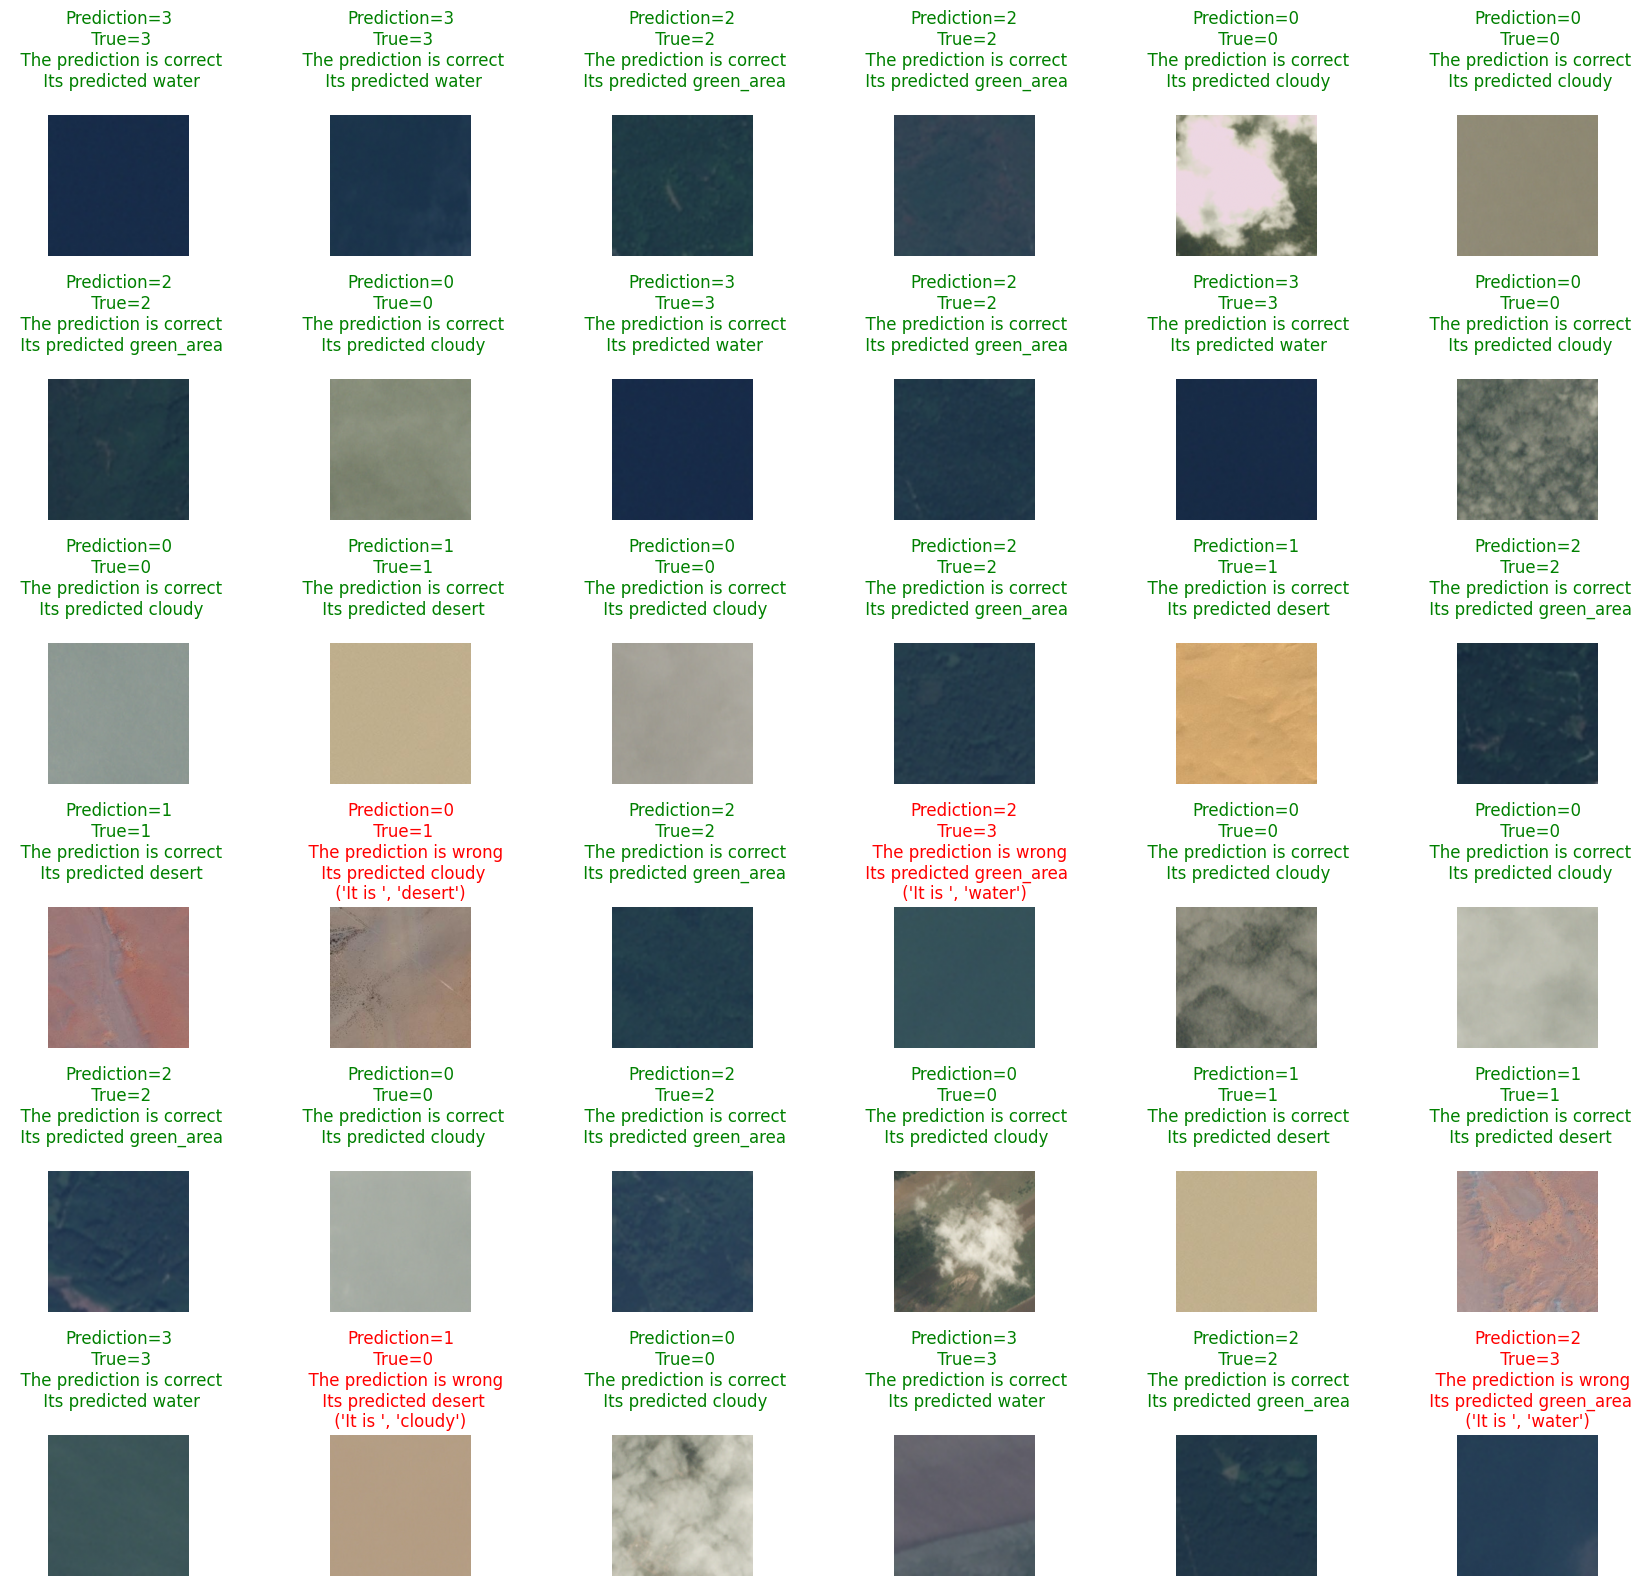

In [ ]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    if predicted_classes[i] == y_test[i]:
      color = 'green'
      its_1 ="The prediction is correct "
      its_2 = Its_predicted[y_test[i]]
      its_3 = ""
    else:
      color = "red"
      its_1 = "The prediction is wrong"
      its_2 = Its_predicted[predicted_classes[i]]
      its_3 = "It is ", Its_predicted[y_test[i]]


    axes[i].imshow(x_test_image[i])

    axes[i].set_title("Prediction={}\n True={}\n  {}\n Its predicted {}\n {} ".format(predicted_classes[i], y_test[i], its_1, its_2, its_3 ), color = color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

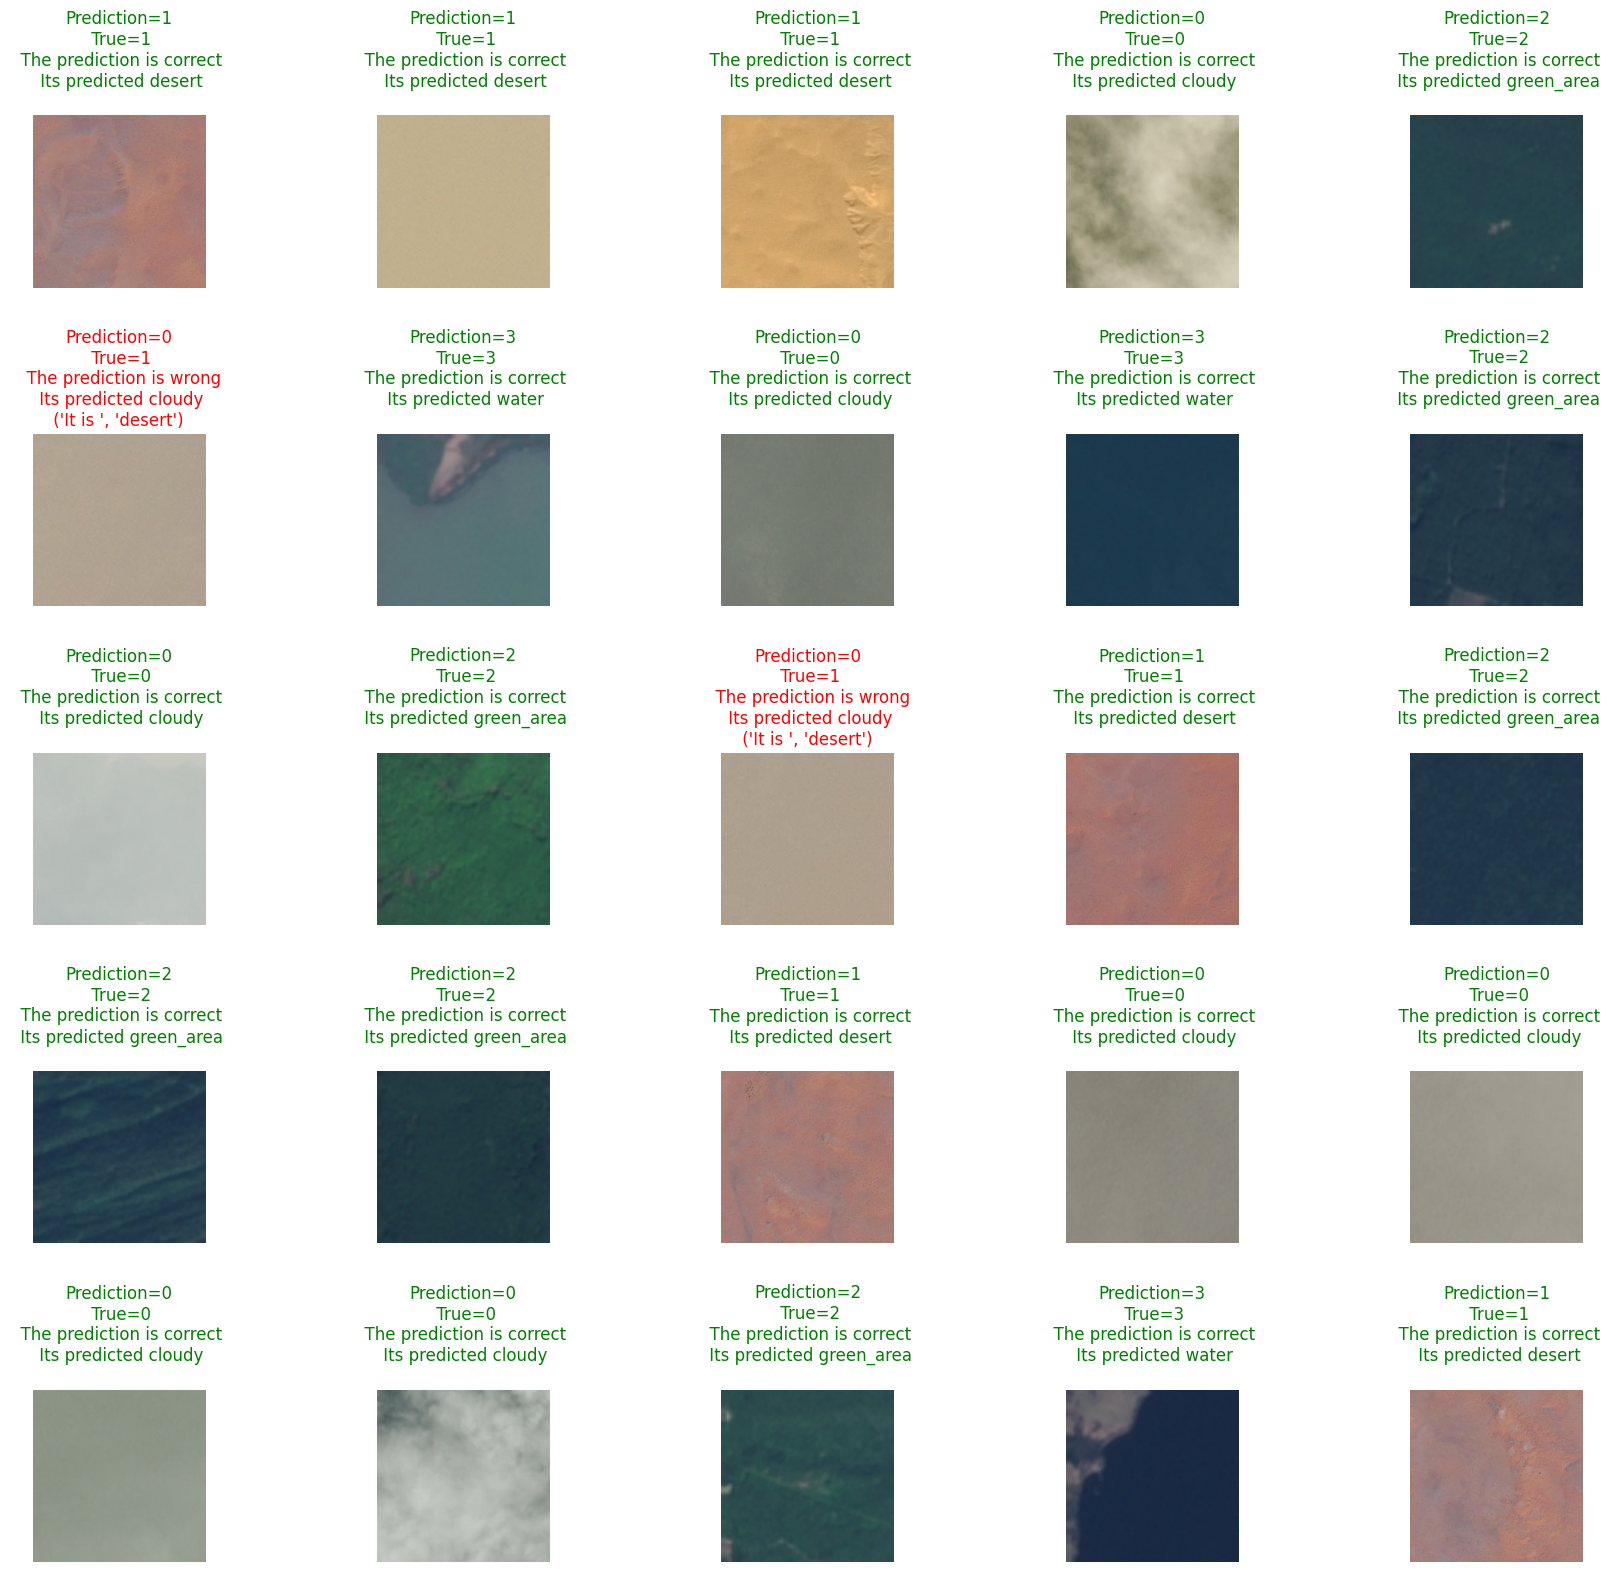

In [ ]:
fig, axes1 = plt.subplots(5, 5, figsize=(20, 20))
axes1 = axes1.ravel()
i = 100

for index in range(25):
    if predicted_classes[i] == y_test[i]:
      color = 'green'
      its_1 ="The prediction is correct "
      its_2 = Its_predicted[y_test[i]]
      its_3 = ""
    else:
      color = "red"
      its_1 = "The prediction is wrong"
      its_2 = Its_predicted[predicted_classes[i]]
      its_3 = "It is ", Its_predicted[y_test[i]]

    axes1[index].imshow(x_test_image[i])
    axes1[index].set_title("Prediction={}\n True={}\n  {}\n Its predicted {}\n {} ".format(predicted_classes[i], y_test[i], its_1, its_2, its_3 ), color = color)
    axes1[index].axis('off')

    i += 1  # Increment i for the next iteration

plt.subplots_adjust(wspace=1)

Using some different models
